In [1]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('pdb_data_no_dups.csv')
data_df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [3]:
data_df.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,141401.000000,128589.000000,1.414010e+05,97039.000000,124724.000000,124749.000000,105110.000000,117602.000000
mean,825.374849,2.263807,1.120790e+05,290.967713,2.670267,51.353163,6.788685,2008.922365
std,2136.461080,1.410878,5.690152e+05,9.541080,0.783740,10.104561,2.556819,8.459286
min,0.000000,0.480000,3.143800e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,226.000000,1.800000,2.612856e+04,290.000000,2.210000,44.370000,6.000000,2005.000000
50%,414.000000,2.100000,4.747779e+04,293.000000,2.490000,50.500000,7.000000,2010.000000
75%,820.000000,2.500000,9.408484e+04,295.000000,2.910000,57.710000,7.500000,2014.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,99.000000,92.000000,724.000000,2018.000000


# Take out non-protein rows

For this project, only protein sequences will be considered. 

In [4]:
prot_df = data_df[data_df['macromoleculeType'] == 'Protein']
print(prot_df.shape)
prot_df.head()

(127798, 14)


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [5]:
prot_df.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,127798.000000,117008.000000,1.277980e+05,88638.000000,114341.000000,114362.000000,95902.000000,105931.000000
mean,721.049046,2.208678,8.955848e+04,291.000731,2.652620,51.113914,6.786939,2009.044746
std,1741.791584,1.339638,4.690485e+05,8.764264,0.687323,10.011235,1.307179,8.521400
min,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,237.000000,1.780000,2.672429e+04,290.000000,2.210000,44.160000,6.000000,2005.000000
50%,416.000000,2.040000,4.706000e+04,293.000000,2.480000,50.200000,7.000000,2010.000000
75%,800.000000,2.490000,9.102404e+04,295.000000,2.890000,57.320000,7.500000,2014.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,13.890000,92.000000,100.000000,2018.000000


In [12]:
import seaborn as sns

# See how many labels there are
Looks like most proteins have a single example available to them, will need to down-select.

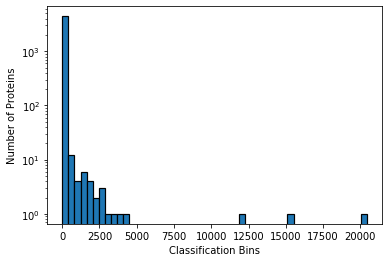

In [7]:
plt.hist(prot_df.groupby('classification').count()['structureId'], bins=50, edgecolor='black', linewidth=1.2)
plt.yscale('log')
plt.xlabel("Classification Bins")
plt.ylabel("Number of Proteins")
plt.savefig('Classification_hist.png', dpi=300)
plt.show()

In [8]:
seq_df = pd.read_csv('pdb_data_seq.csv')
seq_df.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [9]:
seq_df = seq_df[seq_df['macromoleculeType'] == 'Protein']
seq_df.shape

(345180, 5)

# Clean out multimeric proteins

Proteins can exist as either monomers (single protein chain) or multimers (several chains which form a single active unit). Including this complexity will be challenging, but beyond the current scope. All proteins consisting of more than one chain are cleaned.

In [10]:
struct_id_non_monomer = seq_df[seq_df['chainId'] != 'A']['structureId']

In [11]:
seq_df.shape[0] - struct_id_non_monomer.shape[0]

123105

In [12]:
monomer_only = seq_df[~seq_df.structureId.isin(struct_id_non_monomer)]
monomer_only.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [13]:
struct_id_non_monomer.head()

16    104L
41    10GS
68    117E
75    11AS
77    11BA
Name: structureId, dtype: object

In [14]:
prot_class_mon = prot_df[~prot_df.structureId.isin(struct_id_non_monomer)]
prot_class_mon.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


Ensure there is a sequence for every structureId in classification dataframe

In [15]:
prot_class_mon = prot_class_mon[prot_class_mon.structureId.isin(monomer_only['structureId'])]

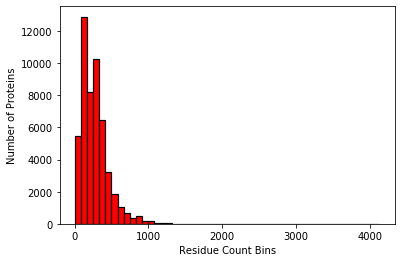

In [18]:
plt.hist(prot_class_mon['residueCount'], bins=50, color='r', edgecolor='black', linewidth=1.2)
#plt.yscale('log')
plt.xlabel("Residue Count Bins")
plt.ylabel("Number of Proteins")
plt.savefig('Residue_count_hist.png', dpi=300)
plt.show()

# Cut out larger proteins

For computational efficiency, only proteins less than 1500 residues will be used

In [92]:
prot_class_mon = prot_class_mon[prot_class_mon['residueCount'] <= 1500]

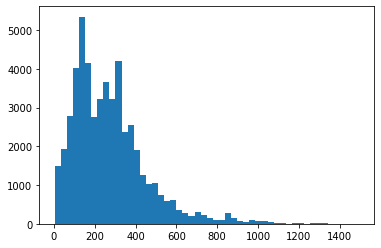

In [36]:
plt.hist(prot_class_mon['residueCount'], bins=50)
plt.show()

# Clean up classifications

Protein classifications are not labeled consitently in terms of case, spacers, etc. Following cells iterate over the data to clean these up as much as possible. 

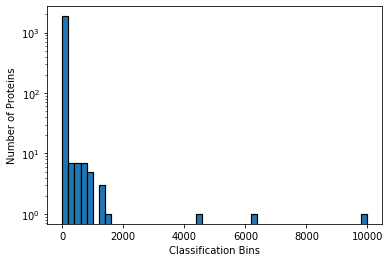

In [19]:
plt.hist(prot_class_mon.groupby('classification').count()['structureId'], bins=50, edgecolor='black', linewidth=1.2)
plt.yscale('log')
plt.xlabel("Classification Bins")
plt.ylabel("Number of Proteins")
plt.savefig('Classification_hist_mon_small.png', dpi=300)
plt.show()

In [21]:
prot_class_mon['classification'] = prot_class_mon['classification'].str.upper()

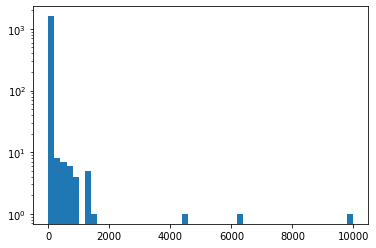

In [22]:
plt.hist(prot_class_mon.groupby('classification').count()['structureId'], bins=50)
plt.yscale('log')
plt.show()

In [74]:
prot_class_mon.groupby('classification').count()['structureId'].sort_values().head(100)

classification
ZORBAMYCIN BINDING PROTEIN                 1
HYDROLASE(ACTING IN CYCLICAMIDINES)        1
PYRIDOXAL PHOSPHATE BINDING                1
HYDROLASE(ACTING ON CYCLIC AMIDES)         1
HYDROLASE(ACTING ON LINEAR AMIDES)         1
PX DOMAIN                                  1
HYDROLASE(AMINOPEPTIDASE)                  1
HYDROLASE(BETA-LACTAMASE)                  1
PUTATIVE SERINE PROTEINASE INHIBITOR       1
HYDROLASE(CARBOXYPEPTIDASE)                1
PTERIN BINDING                             1
HYDROLASE(ACTING IN CYCLIC AMIDES)         1
PROTON TRANSPORT, HYDROLASE                1
PROTOHEME FERRO-LYASE                      1
PROTEINASE/INHIBITOR                       1
PROTEINASE INHIBITOR(KAZAL TYPE)           1
PROTEIN TURNOVER                           1
HYDROLASE(SERINE ESTERASE)                 1
PROTEIN TRANSPORT,SUGAR BINDING PROTEIN    1
PROTEIN TRANSPORT, ENDOCYTOSIS             1
HYDROLASE(SH2 DOMAIN)                      1
PROTEIN TRANSPORT, CHAPERONE REGULATOR  

In [75]:
prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=False).head(100)

classification
HYDROLASE                                9973
TRANSFERASE                              6268
OXIDOREDUCTASE                           4465
LYASE                                    1502
TRANSFERASE/TRANSFERASE INHIBITOR        1291
TRANSCRIPTION                            1262
SIGNALING PROTEIN                        1255
TRANSPORT PROTEIN                        1251
STRUCTURAL GENOMICS, UNKNOWN FUNCTION    1206
HYDROLASE/HYDROLASE INHIBITOR             935
ISOMERASE                                 911
LIGASE                                    828
PROTEIN BINDING                           802
DNA BINDING PROTEIN                       758
VIRAL PROTEIN                             745
METAL BINDING PROTEIN                     711
MEMBRANE PROTEIN                          706
ELECTRON TRANSPORT                        706
TOXIN                                     675
UNKNOWN FUNCTION                          574
CELL ADHESION                             549
STRUCTURAL PROTEIN 

In [94]:
prot_class_mon['classification'] = prot_class_mon['classification'].str.split(',').str.join('/')
prot_class_mon['classification'] = prot_class_mon['classification'].str.replace('/ ', '/')

In [95]:
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=False).head(50))
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=True).head(50))

classification
HYDROLASE                                  9973
TRANSFERASE                                6268
OXIDOREDUCTASE                             4465
LYASE                                      1502
TRANSFERASE/TRANSFERASE INHIBITOR          1291
TRANSCRIPTION                              1262
SIGNALING PROTEIN                          1255
TRANSPORT PROTEIN                          1251
STRUCTURAL GENOMICS/UNKNOWN FUNCTION       1217
HYDROLASE/HYDROLASE INHIBITOR               936
ISOMERASE                                   911
LIGASE                                      828
PROTEIN BINDING                             802
DNA BINDING PROTEIN                         758
VIRAL PROTEIN                               745
METAL BINDING PROTEIN                       711
ELECTRON TRANSPORT                          706
MEMBRANE PROTEIN                            706
TOXIN                                       675
UNKNOWN FUNCTION                            574
CELL ADHESION            

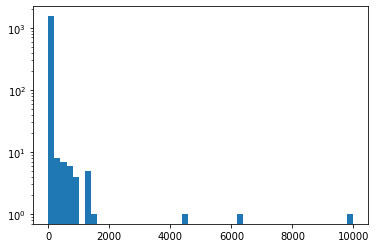

In [61]:
plt.hist(prot_class_mon.groupby('classification').count()['structureId'], bins=50)
plt.yscale('log')
plt.show()

In [96]:
prot_class_mon['classification'] = prot_class_mon['classification'].str.replace(' PROTEIN', '')

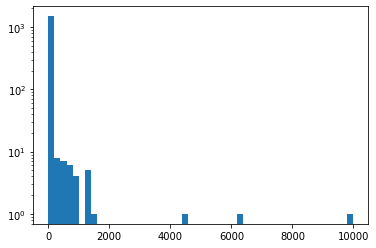

In [81]:
plt.hist(prot_class_mon.groupby('classification').count()['structureId'], bins=50)
plt.yscale('log')
plt.show()

In [83]:
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=False).head(50))
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=True).head(50))

classification
HYDROLASE                                  9973
TRANSFERASE                                6268
OXIDOREDUCTASE                             4465
LYASE                                      1502
TRANSFERASE/TRANSFERASE INHIBITOR          1291
TRANSPORT                                  1273
TRANSCRIPTION                              1262
SIGNALING                                  1258
STRUCTURAL GENOMICS/UNKNOWN FUNCTION       1217
HYDROLASE/HYDROLASE INHIBITOR               936
ISOMERASE                                   911
LIGASE                                      828
PROTEIN BINDING                             802
DNA BINDING                                 761
VIRAL                                       745
METAL BINDING                               711
ELECTRON TRANSPORT                          710
MEMBRANE                                    706
TOXIN                                       675
UNKNOWN FUNCTION                            574
CELL ADHESION            

In [97]:
prot_class_mon['classification'] = prot_class_mon['classification'].str.split().str.join(' ')

In [85]:
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=False).head(50))
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=True).head(50))

classification
HYDROLASE                                  9973
TRANSFERASE                                6268
OXIDOREDUCTASE                             4465
LYASE                                      1502
TRANSFERASE/TRANSFERASE INHIBITOR          1291
TRANSPORT                                  1273
TRANSCRIPTION                              1262
SIGNALING                                  1258
STRUCTURAL GENOMICS/UNKNOWN FUNCTION       1217
HYDROLASE/HYDROLASE INHIBITOR               936
ISOMERASE                                   911
LIGASE                                      828
PROTEIN BINDING                             802
DNA BINDING                                 761
VIRAL                                       745
METAL BINDING                               711
ELECTRON TRANSPORT                          710
MEMBRANE                                    706
TOXIN                                       675
UNKNOWN FUNCTION                            574
CELL ADHESION            

In [99]:
prot_class_mon['classification'] = prot_class_mon['classification'].str.replace(' \(', '(')
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=False).head(50))
print(prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=True).head(50))

classification
HYDROLASE                                  9973
TRANSFERASE                                6268
OXIDOREDUCTASE                             4465
LYASE                                      1502
TRANSFERASE/TRANSFERASE INHIBITOR          1291
TRANSPORT                                  1273
TRANSCRIPTION                              1262
SIGNALING                                  1258
STRUCTURAL GENOMICS/UNKNOWN FUNCTION       1217
HYDROLASE/HYDROLASE INHIBITOR               936
ISOMERASE                                   911
LIGASE                                      828
PROTEIN BINDING                             802
DNA BINDING                                 761
VIRAL                                       745
METAL BINDING                               711
ELECTRON TRANSPORT                          710
MEMBRANE                                    706
TOXIN                                       675
UNKNOWN FUNCTION                            574
CELL ADHESION            

A more thorough consolidation scheme could yield improved results, and of course including multimers will increase number of examples. For now, the top 25 in terms of number of occurrences will be taken. Proteins of unknown function will not be included, but represent an interesting potential testing set for future applications. 

In [100]:
prot_class_mon = prot_class_mon[prot_class_mon['classification'] != 'STRUCTURAL GENOMICS/UNKNOWN FUNCTION']

In [101]:
top_25 = prot_class_mon.groupby('classification').count()['structureId'].sort_values(ascending=False)[:25]

In [105]:
prot_class_mon = prot_class_mon[prot_class_mon.classification.isin(top_25.index)]

In [110]:
monomer_only = monomer_only[monomer_only.structureId.isin(prot_class_mon['structureId'])]

In [112]:
monomer_only.shape

(38484, 5)

In [113]:
prot_class_mon.shape

(38586, 14)

In [116]:
prot_class_mon.drop_duplicates(['structureId'], inplace=True)

In [124]:
monomer_only.set_index('structureId', inplace=True)
monomer_only.sort_index(inplace=True)
prot_class_mon.set_index('structureId', inplace=True)
prot_class_mon.sort_index(inplace=True)

In [125]:
monomer_only.head(5)

,chainId,sequence,residueCount,macromoleculeType
structureId,,,,
155C,A,XNEGDAAKGEKEFNKCKACHMIQAPDGTDIKGGKTGPNLYGVVGRK...,135,Protein
177L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,164,Protein
178L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,164,Protein
1A0I,A,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,348,Protein
1A16,A,SEISRQEFQRRRQALVEQMQPGSAALIFAAPEVTRSADSEYPYRQN...,440,Protein


In [126]:
prot_class_mon.head(5)

,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
structureId,,,,,,,,,,,,,
155C,ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,135,2.50,14891.75,NaN,NaN,1.94,36.55,NaN,NaN,1976.0
177L,HYDROLASE,X-RAY DIFFRACTION,Protein,164,2.50,18562.37,NaN,NaN,2.92,57.83,pH 8.6,8.6,1995.0
178L,HYDROLASE,X-RAY DIFFRACTION,Protein,164,2.71,18633.27,NaN,NaN,3.71,66.87,NaN,NaN,1995.0
1A0I,LIGASE,X-RAY DIFFRACTION,Protein,348,2.60,40395.68,NaN,NaN,2.73,54.98,NaN,NaN,1996.0
1A16,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,440,2.30,50100.24,NaN,NaN,4.50,72.00,pH 8.3 THE CRYSTALS WERE SOAKED IN A SOLUTION...,8.3,1998.0


In [155]:
data_final = pd.concat((monomer_only['sequence'], prot_class_mon['classification']), axis=1)

# Cleaning non-standard amino acids

The final step is to clean out sequences containing non-standard amino acids. Future iterations of this network will need to find a way to incorporate these, but for now they are not occuring with high frequency.

In [135]:
non_standard = []
num = 0
for seq in data_final['sequence']:
    interset = list(set(seq) - set('ARNDCQEGHILKMFPSTWYV'))
    if len(interset) > 0:
        num += 1
        non_standard += interset
print(num)
non_standard = list(set(non_standard))

533


In [156]:
for aa in non_standard:
    data_final = data_final[~data_final.sequence.str.contains(aa)]

In [157]:
num = 0
for seq in data_final['sequence']:
    interset = list(set(seq) - set('ARNDCQEGHILKMFPSTWYV'))
    if len(interset) > 0:
        num += 1
print(num)

0


In [159]:
data_final.to_csv('Seq_class.csv')